This dataset shows COVID cases in Korea by agegroup (in "slices" of ten years)- we'll us it to visualise the spread of the disease by age group over time

In [1]:
# Import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ages = pd.read_csv("C:\\Users\\user\\Desktop\\Data\\TimeAge.csv")
ages.head() # Inspect to check we have the right data

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [2]:
ages.info() # Check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1089 non-null   object
 1   time       1089 non-null   int64 
 2   age        1089 non-null   object
 3   confirmed  1089 non-null   int64 
 4   deceased   1089 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.7+ KB


We have columns for the date, time, age (by which we mean the different agegroups), confirmed cases and numbers who died. We'll look closer at the at the date and time columns to see exactly what they contain

In [3]:
print(ages["date"].describe())
print(ages["time"].describe())

count           1089
unique           121
top       2020-03-23
freq               9
Name: date, dtype: object
count    1089.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: time, dtype: float64


In [4]:
# Time has no values in, so we can drop it. Date has 9 values for each date from March to July 2020.
ages.drop(["time"], axis=1, inplace=True)
ages.head()

,date,age,confirmed,deceased
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1


To compare across the agegroups, we will make separate dataframes for each agegroup

In [5]:
ages.index = pd.to_datetime(ages["date"]) # change the index to the date for easier plotting later
under_ten = ages[ages["age"] == "0s"] # make individual dataframes for each agegroup
tens = ages[ages["age"] == "10s"]
twenties = ages[ages["age"] == "20s"]
thirties = ages[ages["age"] == "30s"]
forties = ages[ages["age"] == "40s"]
fifties = ages[ages["age"] == "50s"]
sixties = ages[ages["age"] == "60s"]
seventies = ages[ages["age"] == "70s"]
eighties = ages[ages["age"] == "80s"]

print(under_ten.head()) # Check that it looks right



    

                  date age  confirmed  deceased
date                                           
2020-03-02  2020-03-02  0s         32         0
2020-03-03  2020-03-03  0s         34         0
2020-03-04  2020-03-04  0s         34         0
2020-03-05  2020-03-05  0s         38         0
2020-03-06  2020-03-06  0s         45         0


Now that we have separate dataframes for each of the agegroups we can easily compare them. As a first example, we'll look at confirmed cases for those under thirty:

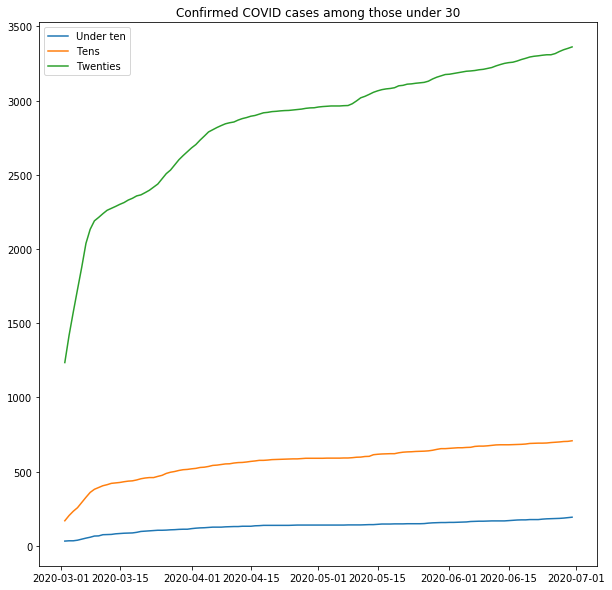

In [6]:
fig = plt.subplots (figsize=(10,10))
plt.plot(under_ten["confirmed"], label="Under ten")
plt.plot(tens["confirmed"], label="Tens")
plt.plot(twenties["confirmed"], label="Twenties")
plt.legend()
plt.title("Confirmed COVID cases among those under 30")
plt.show()

This shows us that for those under twenty, there have not been many cases and they have increased very gradually, whereas for those in their twenties, cases are much more common and have increased quickly beore flattening off. Now let's look at all of our agegroups to see how they compare.

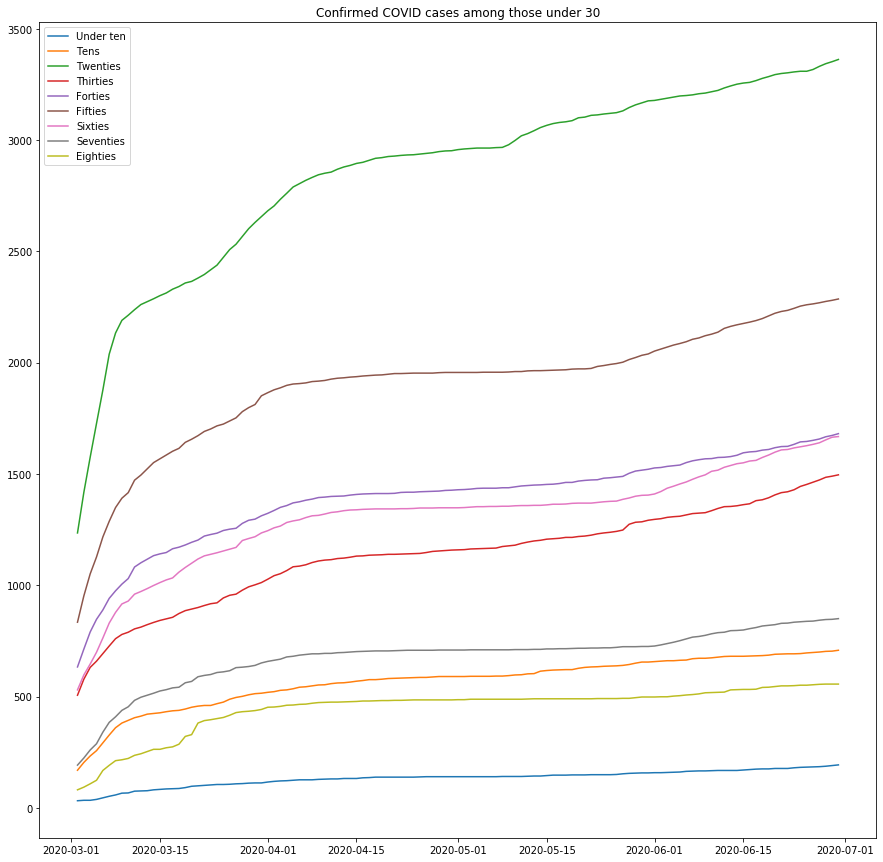

In [7]:
fig = plt.subplots (figsize=(15,15)) # Make a larger plot as we'll have several lines on there
plt.plot(under_ten["confirmed"], label="Under ten")
plt.plot(tens["confirmed"], label="Tens")
plt.plot(twenties["confirmed"], label="Twenties")
plt.plot(thirties["confirmed"], label="Thirties")
plt.plot(forties["confirmed"], label="Forties")
plt.plot(fifties["confirmed"], label="Fifties")
plt.plot(sixties["confirmed"], label="Sixties")
plt.plot(seventies["confirmed"], label="Seventies")
plt.plot(eighties["confirmed"], label="Eighties")
plt.legend()
plt.title("Confirmed COVID cases by agegroup")
plt.show()

People in their twenties have seen the steepest rise and the highest number of confirmed cases. Could this be because there are just more people in their twenties? A quick look at South Korea's population pyramid shows that's not the case (https://www.populationpyramid.net/republic-of-korea/2020/). They have the relatively flat pyramid you would expect of a developed economy. Why might people in their twenties get the virus more? They could be more predisposed to it, but they could also socialise more with a wider range of people, exposting themselves to greater risk. We can't know this for certain from the data we have, but it's a reasonable hypothesis.

Now we'll look at deaths. We can visualise deaths and confirmed cases quickly for each agegroup with our agegroup dataframes. For exampple, here it is for the twenties agegroup:

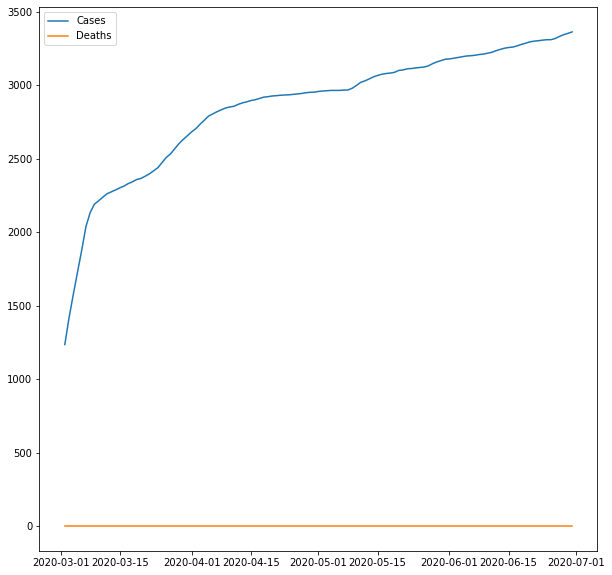

In [8]:
fig = plt.subplots (figsize=(10,10))
plt.plot(twenties["confirmed"], label="Cases")
plt.plot(twenties["deceased"], label="Deaths")
plt.legend()
plt.show()

This shows that there were no deaths at all for those in their twenties between March and July, despite the rise in cases. This might be different for a more at-risk group though, say those in their eighties:

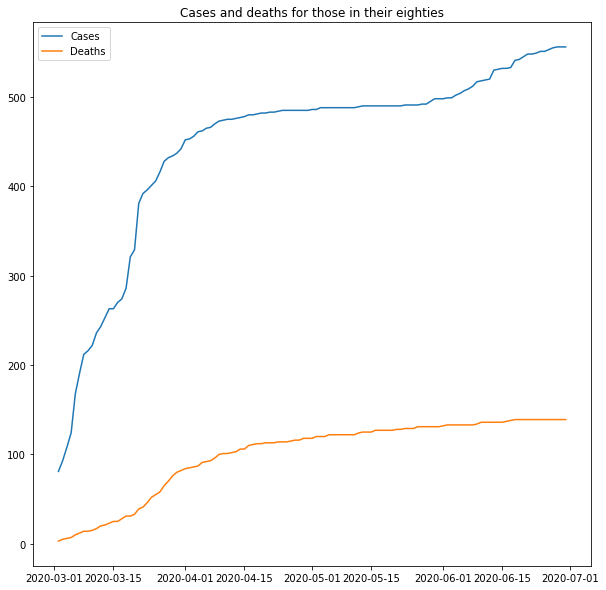

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(eighties["confirmed"], label="Cases")
ax.plot(eighties["deceased"], label="Deaths")
ax.set_title("Cases and deaths for those in their eighties")
plt.legend()
plt.show()

This shows a gradual increase in the number of deaths that then flattens off. The initial increase is nowhere near as steep as the inital increase in cases, suggesting that care was given to those suffering most from the disease. Now we can visualise deaths for all of the agegroups - we would expect to see the steepest increase, and the highest number of deaths, in the oldest sections of the population:

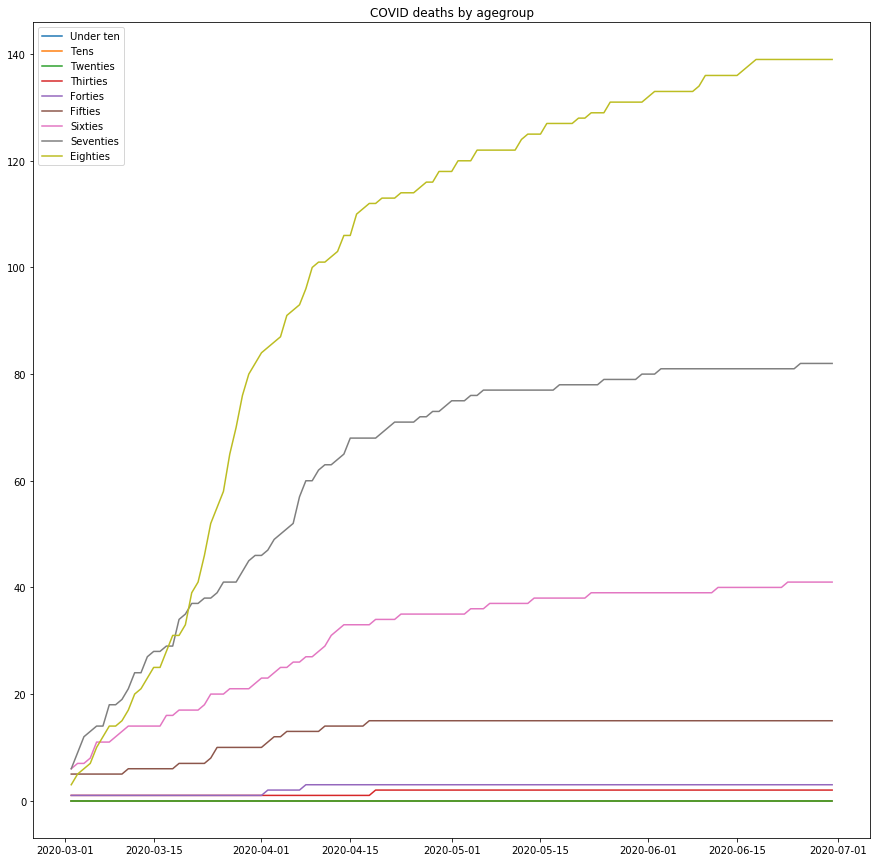

In [21]:
fig = plt.subplots (figsize=(15,15)) # Make a larger plot as we'll have several lines on there
plt.plot(under_ten["deceased"], label="Under ten")
plt.plot(tens["deceased"], label="Tens")
plt.plot(twenties["deceased"], label="Twenties")
plt.plot(thirties["deceased"], label="Thirties")
plt.plot(forties["deceased"], label="Forties")
plt.plot(fifties["deceased"], label="Fifties")
plt.plot(sixties["deceased"], label="Sixties")
plt.plot(seventies["deceased"], label="Seventies")
plt.plot(eighties["deceased"], label="Eighties")
plt.legend()
plt.title("COVID deaths by agegroup")
plt.show()

The result is what we would expect, but perhaps not the size of the difference between agegroups. The older the agegroup the steeper the increase in deaths beginning in March. But the increase is comfortably steeper for those in their eighties compared to those in their seventies, and for those in their seventies compared to those in their fifties. We can also see that no-one under the age of thirty died in this period, an impressive feat!